*Predict the price of an unknown  car *

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [46]:
df= pd.read_csv('/content/used_cars_data.csv',index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [48]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [49]:
df['Price'].nunique()

1373

In [50]:
df.apply(lambda x:x.unique(),axis=0)

Name                 [Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD...
Location             [Mumbai, Pune, Chennai, Coimbatore, Hyderabad,...
Year                 [2010, 2015, 2011, 2012, 2013, 2016, 2018, 201...
Kilometers_Driven    [72000, 41000, 46000, 87000, 40670, 75000, 869...
Fuel_Type                         [CNG, Diesel, Petrol, LPG, Electric]
Transmission                                       [Manual, Automatic]
Owner_Type                      [First, Second, Fourth & Above, Third]
Mileage              [26.6 km/kg, 19.67 kmpl, 18.2 kmpl, 20.77 kmpl...
Engine               [998 CC, 1582 CC, 1199 CC, 1248 CC, 1968 CC, 8...
Power                [58.16 bhp, 126.2 bhp, 88.7 bhp, 88.76 bhp, 14...
Seats                [5.0, 7.0, 8.0, 4.0, 6.0, 2.0, nan, 10.0, 9.0,...
New_Price            [nan, 8.61 Lakh, 21 Lakh, 10.65 Lakh, 32.01 La...
Price                [1.75, 12.5, 4.5, 6.0, 17.74, 2.35, 3.5, 17.5,...
dtype: object

In [51]:
df.groupby('Price').describe().T

Price                     0.44          0.45    ...  120.00   160.00
Year              count      1.0      3.000000  ...     1.0      1.0
                  mean    2011.0   2002.333333  ...  2011.0   2017.0
                  std        NaN      3.785939  ...     NaN      NaN
                  min     2011.0   1998.000000  ...  2011.0   2017.0
                  25%     2011.0   2001.000000  ...  2011.0   2017.0
                  50%     2011.0   2004.000000  ...  2011.0   2017.0
                  75%     2011.0   2004.500000  ...  2011.0   2017.0
                  max     2011.0   2005.000000  ...  2011.0   2017.0
Kilometers_Driven count      1.0      3.000000  ...     1.0      1.0
                  mean   65000.0  64383.333333  ...  6500.0  25000.0
                  std        NaN  45595.403643  ...     NaN      NaN
                  min    65000.0  12000.000000  ...  6500.0  25000.0
                  25%    65000.0  49000.000000  ...  6500.0  25000.0
                  50%    65000.0  86000.000000  ...  6500.0  25000.0
                  75%    65000.0  90575.000000  ...  6500.0  25000.0
                  max    65000.0  95150.000000  ...  6500.0  25000.0
Seats             count      1.0      3.000000  ...     1.0      1.0
                  mean       4.0      4.666667  ...     2.0      5.0
                  std        NaN      0.577350  ...     NaN      NaN
                  min        4.0      4.000000  ...     2.0      5.0
                  25%        4.0      4.500000  ...     2.0      5.0
                  50%        4.0      5.000000  ...     2.0      5.0
                  75%        4.0      5.000000  ...     2.0      5.0
                  max        4.0      5.000000  ...     2.0      5.0

[24 rows x 1373 columns]

In [52]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [53]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


**convert str to float **

In [54]:
 def convert(x):
   if not pd.isnull(x):
     try:
       return float(x.split()[0])
     except Exception:
         return np.nan
     else:
           return np.nan

In [55]:
df['Power']=df['Power'].apply(convert)
df['Power']

S.No.
0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7248    103.60
7249    103.60
7250     63.10
7251    103.60
7252    170.00
Name: Power, Length: 7253, dtype: float64

In [56]:
df['Engine']=df['Engine'].apply(convert)
df['Engine']

S.No.
0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7253, dtype: float64

In [57]:
df['Mileage']=df['Mileage'].apply(convert)
df['Mileage']

S.No.
0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage, Length: 7253, dtype: float64

In [58]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [59]:
df['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

categorical data convert in numeric data

In [60]:
df['Transmission'].str.get_dummies()

,Automatic,Manual
S.No.,,
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7248,0,1
7249,1,0
7250,0,1


In [61]:
df['Manual']=pd.get_dummies(df['Transmission'],drop_first=True)
df['Manual']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manual
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,0


now you can remove Transmission column bcoz we have created new column as a manual at the end 

now fuel type convert

In [62]:
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [63]:
df['Fuel_Type'].str.get_dummies()

,CNG,Diesel,Electric,LPG,Petrol
S.No.,,,,,
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
7248,0,1,0,0,0
7249,0,0,0,0,1
7250,0,1,0,0,0


owner type convert

In [64]:
df['Owner_Type'].str.get_dummies()

,First,Fourth & Above,Second,Third
S.No.,,,,
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7248,1,0,0,0
7249,1,0,0,0
7250,1,0,0,0


now concat the updated data

In [65]:
df= pd.concat([df,df['Fuel_Type'].str.get_dummies()],axis=1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manual,CNG,Diesel,Electric,LPG,Petrol
S.No.,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,1,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,1,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,1,0,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,1,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,1,0,1,0,0,0
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,0,0,0,0,0,1
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,1,0,1,0,0,0


same for owner type

In [66]:
df= pd.concat([df,df['Owner_Type'].str.get_dummies()],axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,1,1,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,1,0,1,0,0,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,1,0,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,1,0,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,0,0,1,0,0,0,0,0,1,0


now time to remove some columns

In [67]:
df.drop(['Transmission','Fuel_Type', 'Owner_Type', 'New_Price'],axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
S.No.,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,1,1,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,1,0,0,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,18.20,1199.0,88.70,5.0,4.50,1,0,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,1,0


now find out some relationship using seaborn and scatter plot

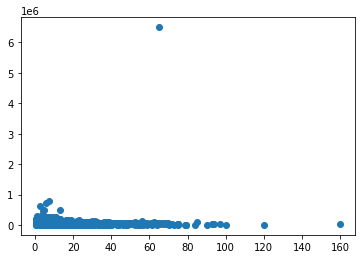

In [68]:
plt.scatter(df['Price'],df['Kilometers_Driven'])

Text(0, 0.5, 'Kms')

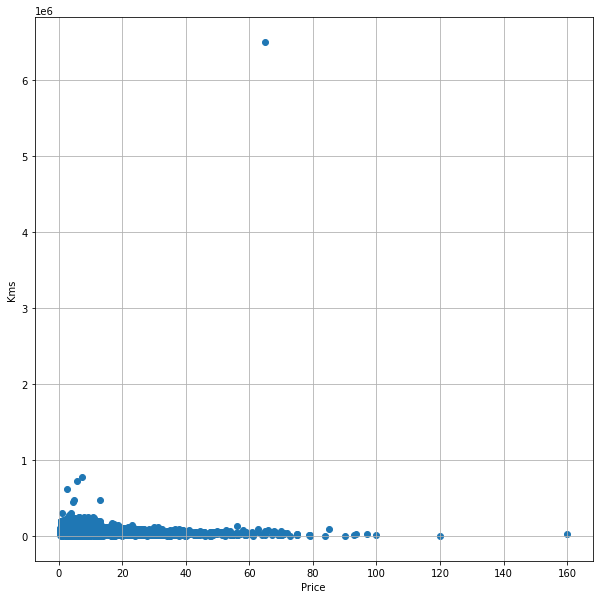

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Kilometers_Driven'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('Kms')

no linearity becaue Kms more price will be less!! in upper graph

Text(0, 0.5, 'Mileage')

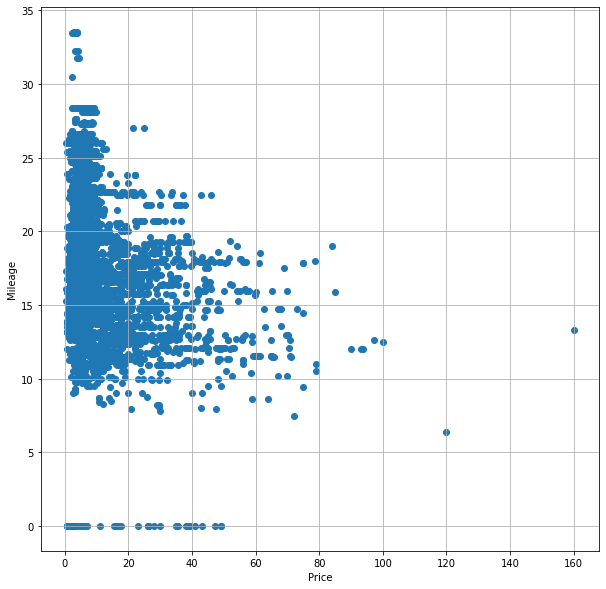

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Mileage'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('Mileage')

no positive linearity upper graph

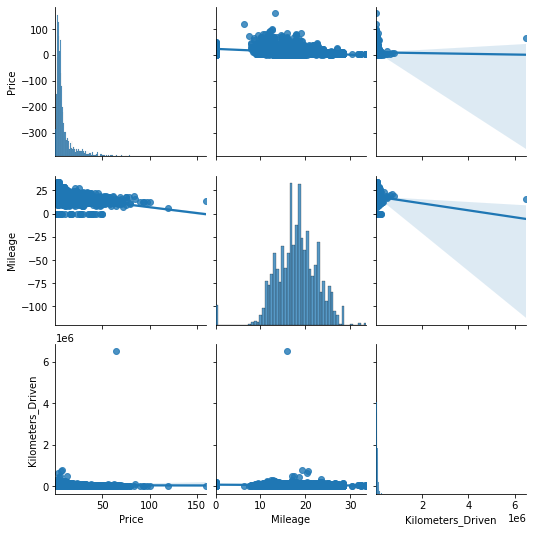

In [71]:
sns.pairplot(df[['Price','Mileage','Kilometers_Driven']],kind='reg')

no linearity showing 

In [72]:
df= pd.concat([df,pd.get_dummies(df['Location'])],axis=1)
df.drop('Location',axis=1,inplace=True)

In [73]:
df.dropna(inplace=True)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Mileage            5872 non-null   float64
 4   Engine             5872 non-null   float64
 5   Power              5872 non-null   float64
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Manual             5872 non-null   uint8  
 9   CNG                5872 non-null   int64  
 10  Diesel             5872 non-null   int64  
 11  Electric           5872 non-null   int64  
 12  LPG                5872 non-null   int64  
 13  Petrol             5872 non-null   int64  
 14  First              5872 non-null   int64  
 15  Fourth & Above     5872 non-null   int64  
 16  Second             5872 

In [75]:
df['Name']= df['Name'].apply(lambda x:x.split()[0])
df=pd.concat([df,pd.get_dummies(df['Name'])],axis=1)
df.drop('Name',axis=1,inplace=True)

In [76]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest= train_test_split(df.drop('Price',axis=1), df['Price'],test_size=0.25,random_state=101)

In [78]:
from sklearn.linear_model import LinearRegression


In [79]:
model=LinearRegression().fit(xtrain,ytrain)



In [80]:
model.score(xtest,ytest)*100

74.04010462306077